In [1]:
import pandas as pd
import utilz
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/customer_segmentation.csv")

In [3]:
# Remove unnecessary columns
data.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)

Income feature have 24 NAN value.
The mean value of Income feature is 52247
The median value of Income feature is 51381


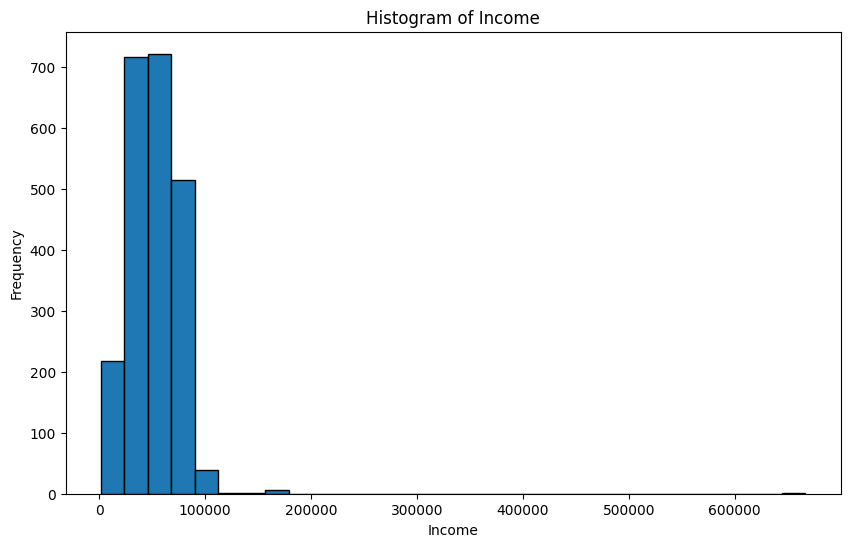

In [4]:
# NAN values in Income feature
print(f"Income feature have {data['Income'].isna().sum()} NAN value.")
print(f"The mean value of Income feature is {int(data['Income'].mean())}")
print(f"The median value of Income feature is {int(data['Income'].median())}")
utilz.visualize_feature(data, "Income")

In [5]:
# Replace NAN values with median value of Income feature
data["Income"].fillna(data["Income"].median(), inplace=True)
print(f"Income feature have {data['Income'].isna().sum()} NAN value.")

Income feature have 0 NAN value.


In [6]:
# Extract the Age feature from Year_Birth since 2014 
data['Age'] = 2014 - data['Year_Birth']
data.drop(columns=["Year_Birth"], inplace=True)

In [7]:
# Convert the Dt_Customer feature to dateTime type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%d-%m-%Y')

# Extract year and month from Dt_Customer feature
data['Dt_Customer_Year'] = data['Dt_Customer'].dt.year
data['Dt_Customer_Month'] = data['Dt_Customer'].dt.month
data.drop(columns=["Dt_Customer"], inplace=True)

Before removing outlier:


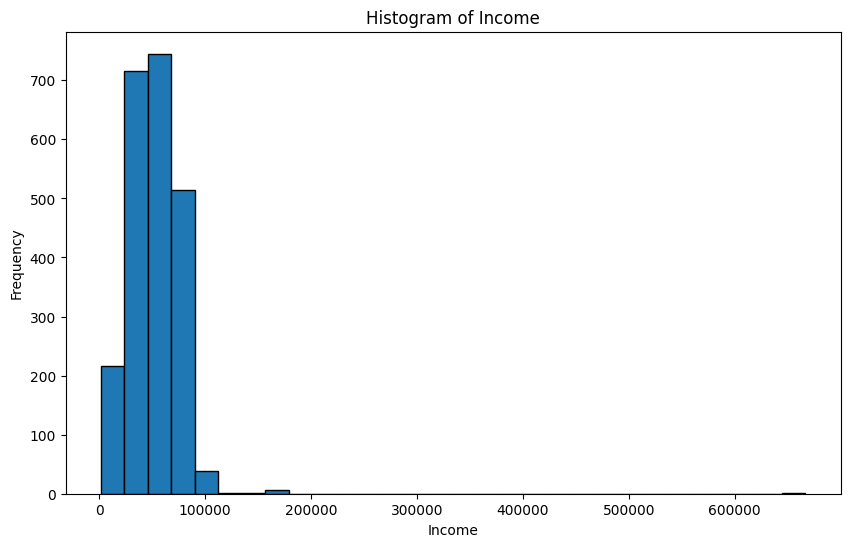

After removing outlier:


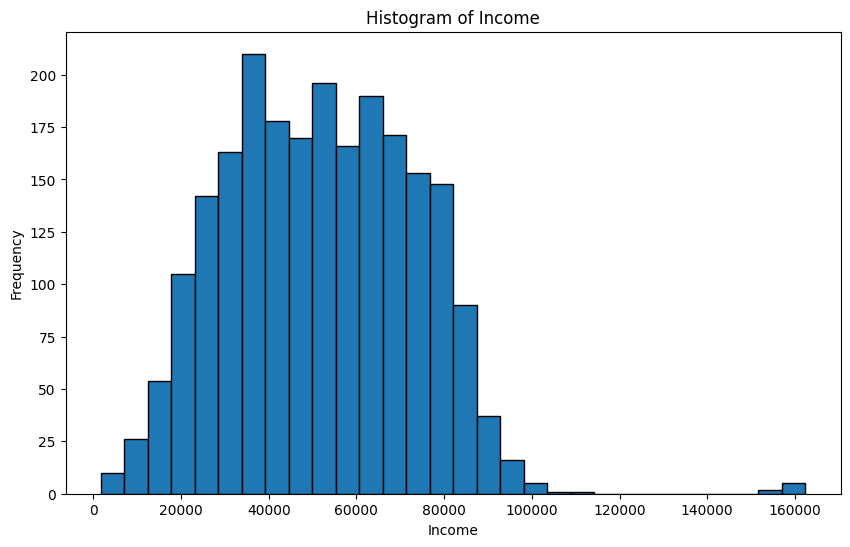

In [8]:
# remove outliers from Income feature
print("Before removing outlier:")
utilz.visualize_feature(data, "Income")
data = data.loc[data['Income'] <= 200000]
print("After removing outlier:")
utilz.visualize_feature(data, "Income")

Before removing outlier:


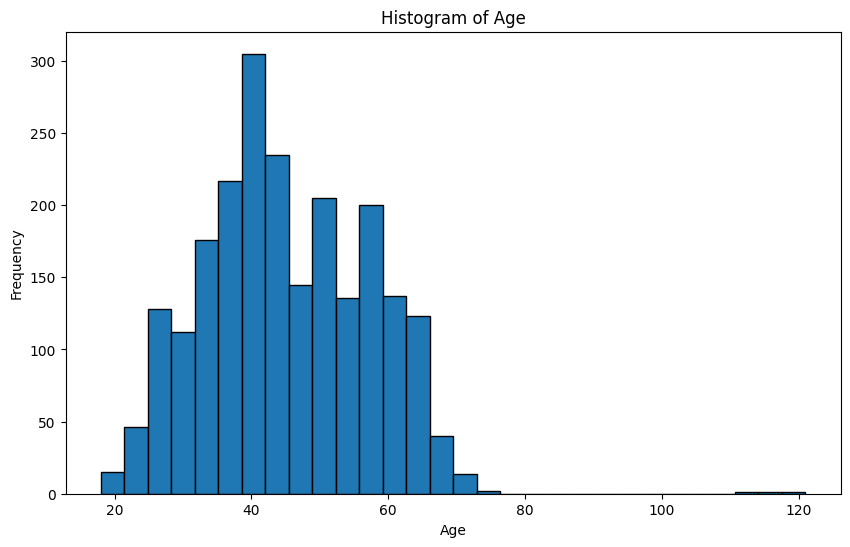

After removing outlier:


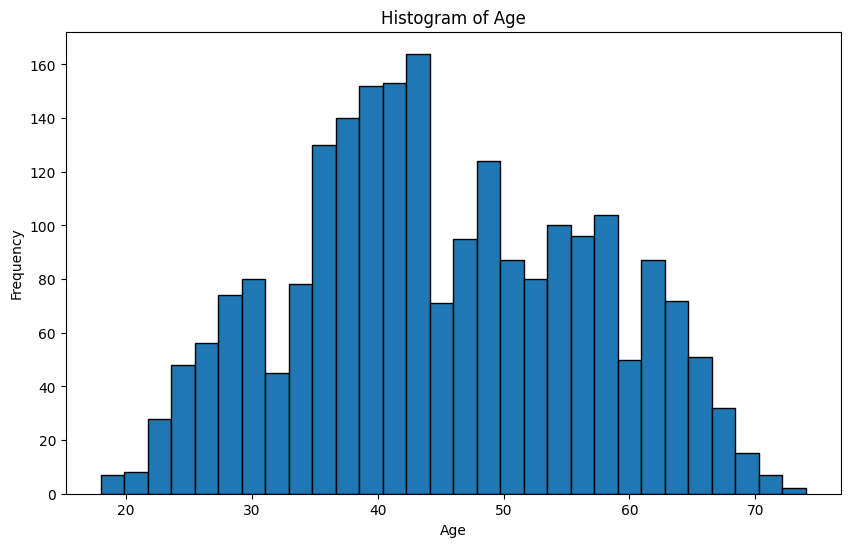

In [9]:
# remove outliers from Income feature
print("Before removing outlier:")
utilz.visualize_feature(data, "Age")
data = data.loc[data['Age'] <= 100]
print("After removing outlier:")
utilz.visualize_feature(data, "Age")

In [10]:
# Encoded objects type features
object_features = data.columns[data.dtypes == object]

In [11]:
print(f"Unique values of {object_features[0]}: {data[object_features[0]].unique()}")
print(f"Unique values of {object_features[1]}: {data[object_features[1]].unique()}")

Unique values of Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values of Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [12]:
# Replace YOLO and Absurd to Alone value in Marital_Status feature
data[object_features[1]] = data[object_features[1]].replace({"YOLO": "Alone", "Absurd":"Alone"})
print("Unique values after replace values to Alone:")
data[object_features[1]].unique()

Unique values after replace values to Alone:


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [13]:
data = pd.get_dummies(data, columns=['Marital_Status', 'Education'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2236 non-null   float64
 1   Kidhome                  2236 non-null   int64  
 2   Teenhome                 2236 non-null   int64  
 3   Recency                  2236 non-null   int64  
 4   MntWines                 2236 non-null   int64  
 5   MntFruits                2236 non-null   int64  
 6   MntMeatProducts          2236 non-null   int64  
 7   MntFishProducts          2236 non-null   int64  
 8   MntSweetProducts         2236 non-null   int64  
 9   MntGoldProds             2236 non-null   int64  
 10  NumDealsPurchases        2236 non-null   int64  
 11  NumWebPurchases          2236 non-null   int64  
 12  NumCatalogPurchases      2236 non-null   int64  
 13  NumStorePurchases        2236 non-null   int64  
 14  NumWebVisitsMonth       

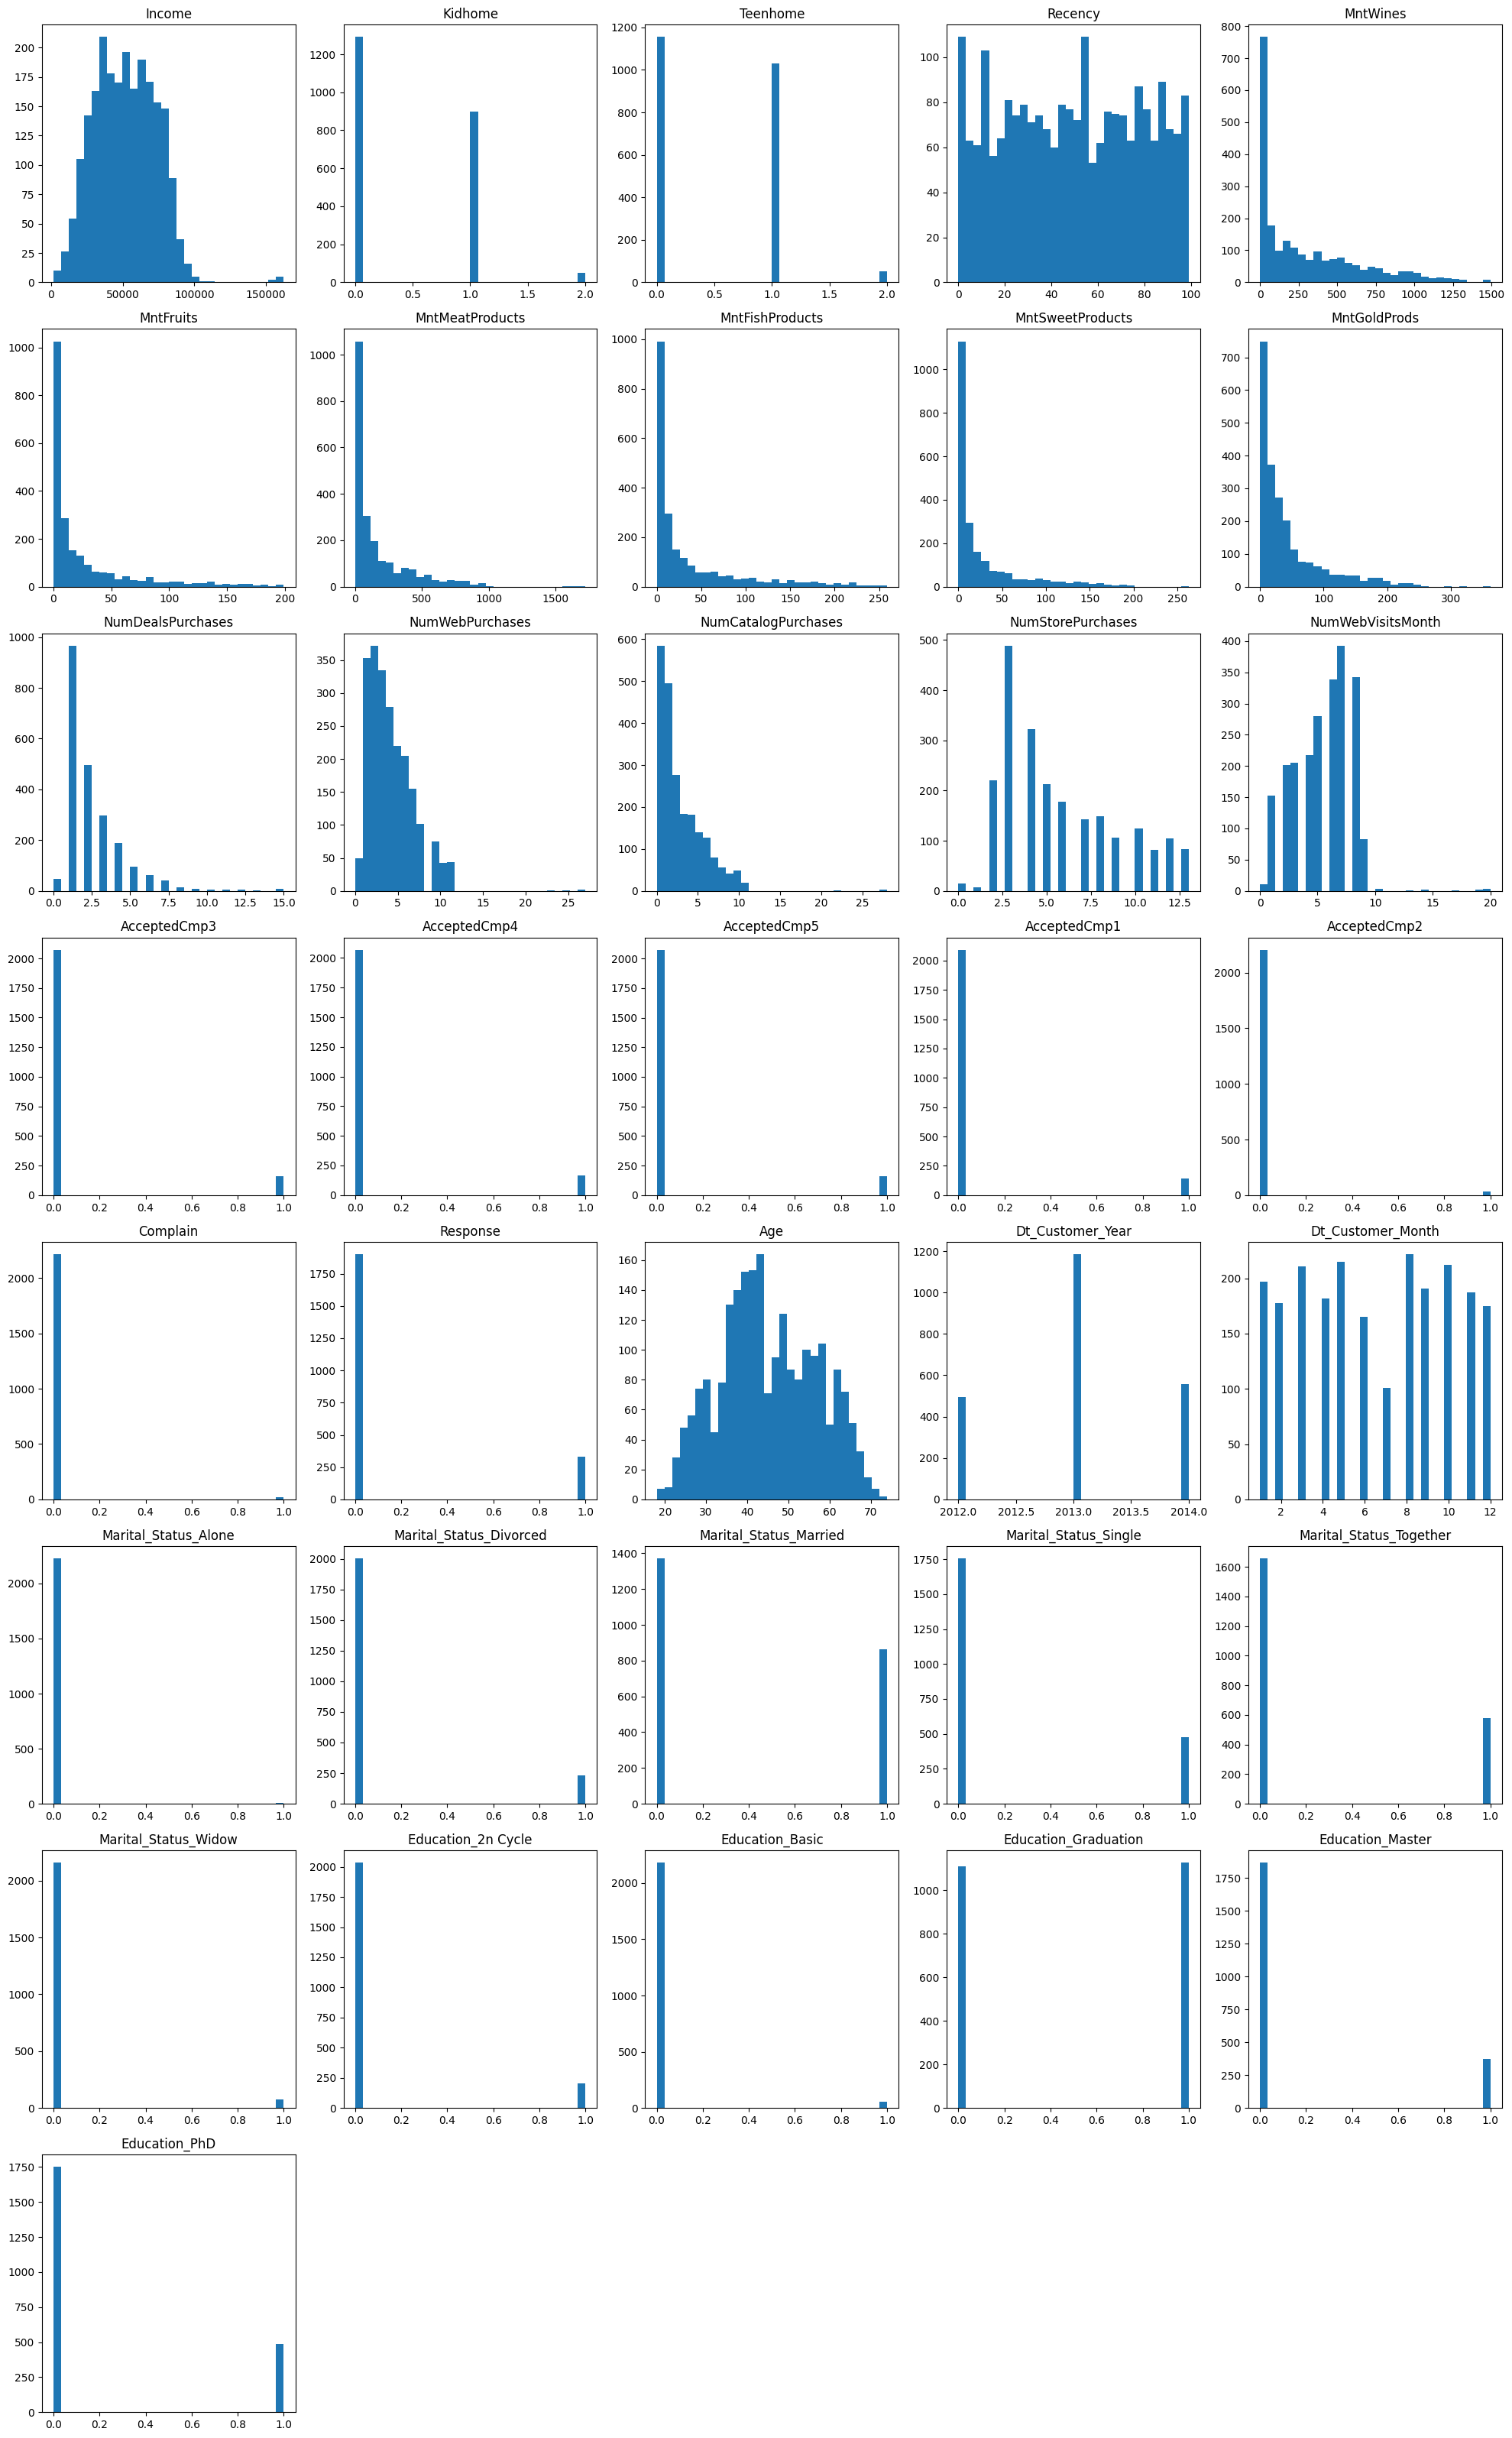

In [15]:
utilz.visualize_features(data) 

In [16]:
data.to_csv('./data/processed_data.csv', index=False)

In [17]:
# Define right-skewed features
right_skewed_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

handled_skewed_data = data.copy()

# Log-transform the right-skewed features
for feature in right_skewed_features:
    handled_skewed_data[feature] = np.log1p(handled_skewed_data[feature])

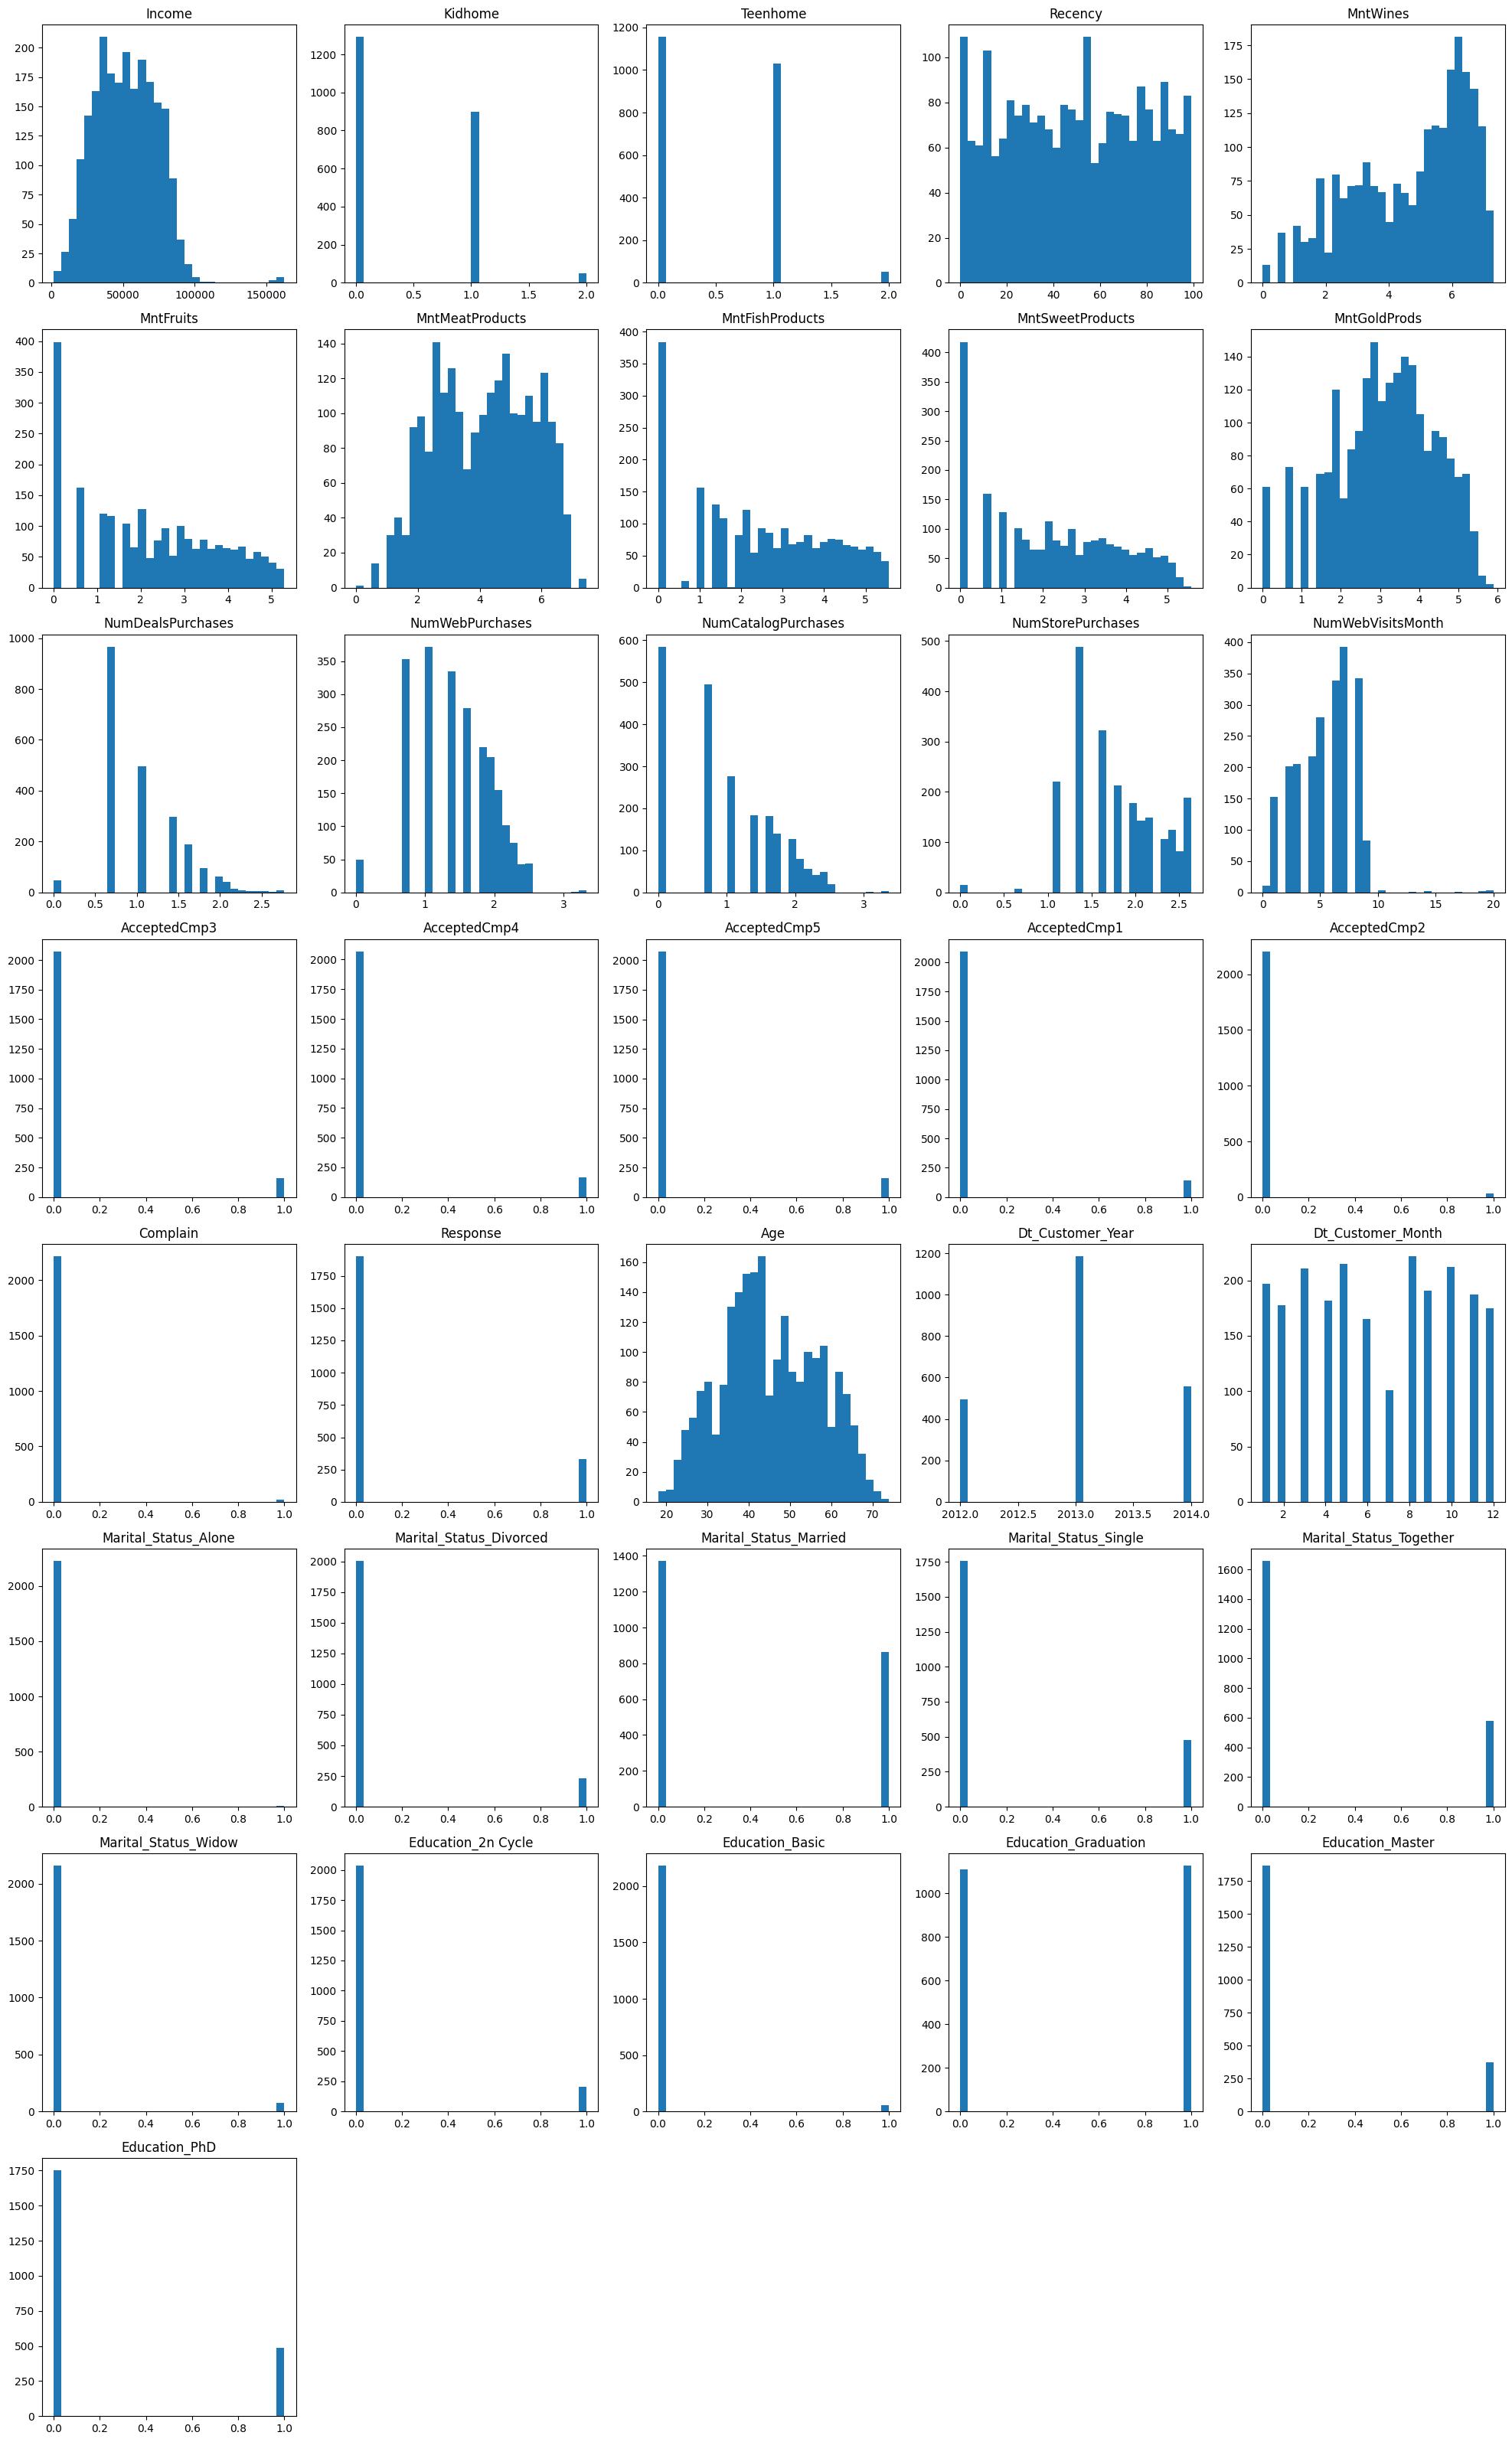

In [18]:
utilz.visualize_features(handled_skewed_data)

In [19]:
handled_skewed_data.to_csv('./data/handled_skewed_data.csv', index=False)

In [20]:
# Scaling the data
scaler = StandardScaler()
scaled_skewed_data = scaler.fit_transform(handled_skewed_data)

# Save the scaled data back into the DataFrame
scaled_skewed_data = pd.DataFrame(scaled_skewed_data, columns=data.columns)

# Drop the original log-transformed columns if not needed
scaled_skewed_data.drop(columns=right_skewed_features, inplace=True)

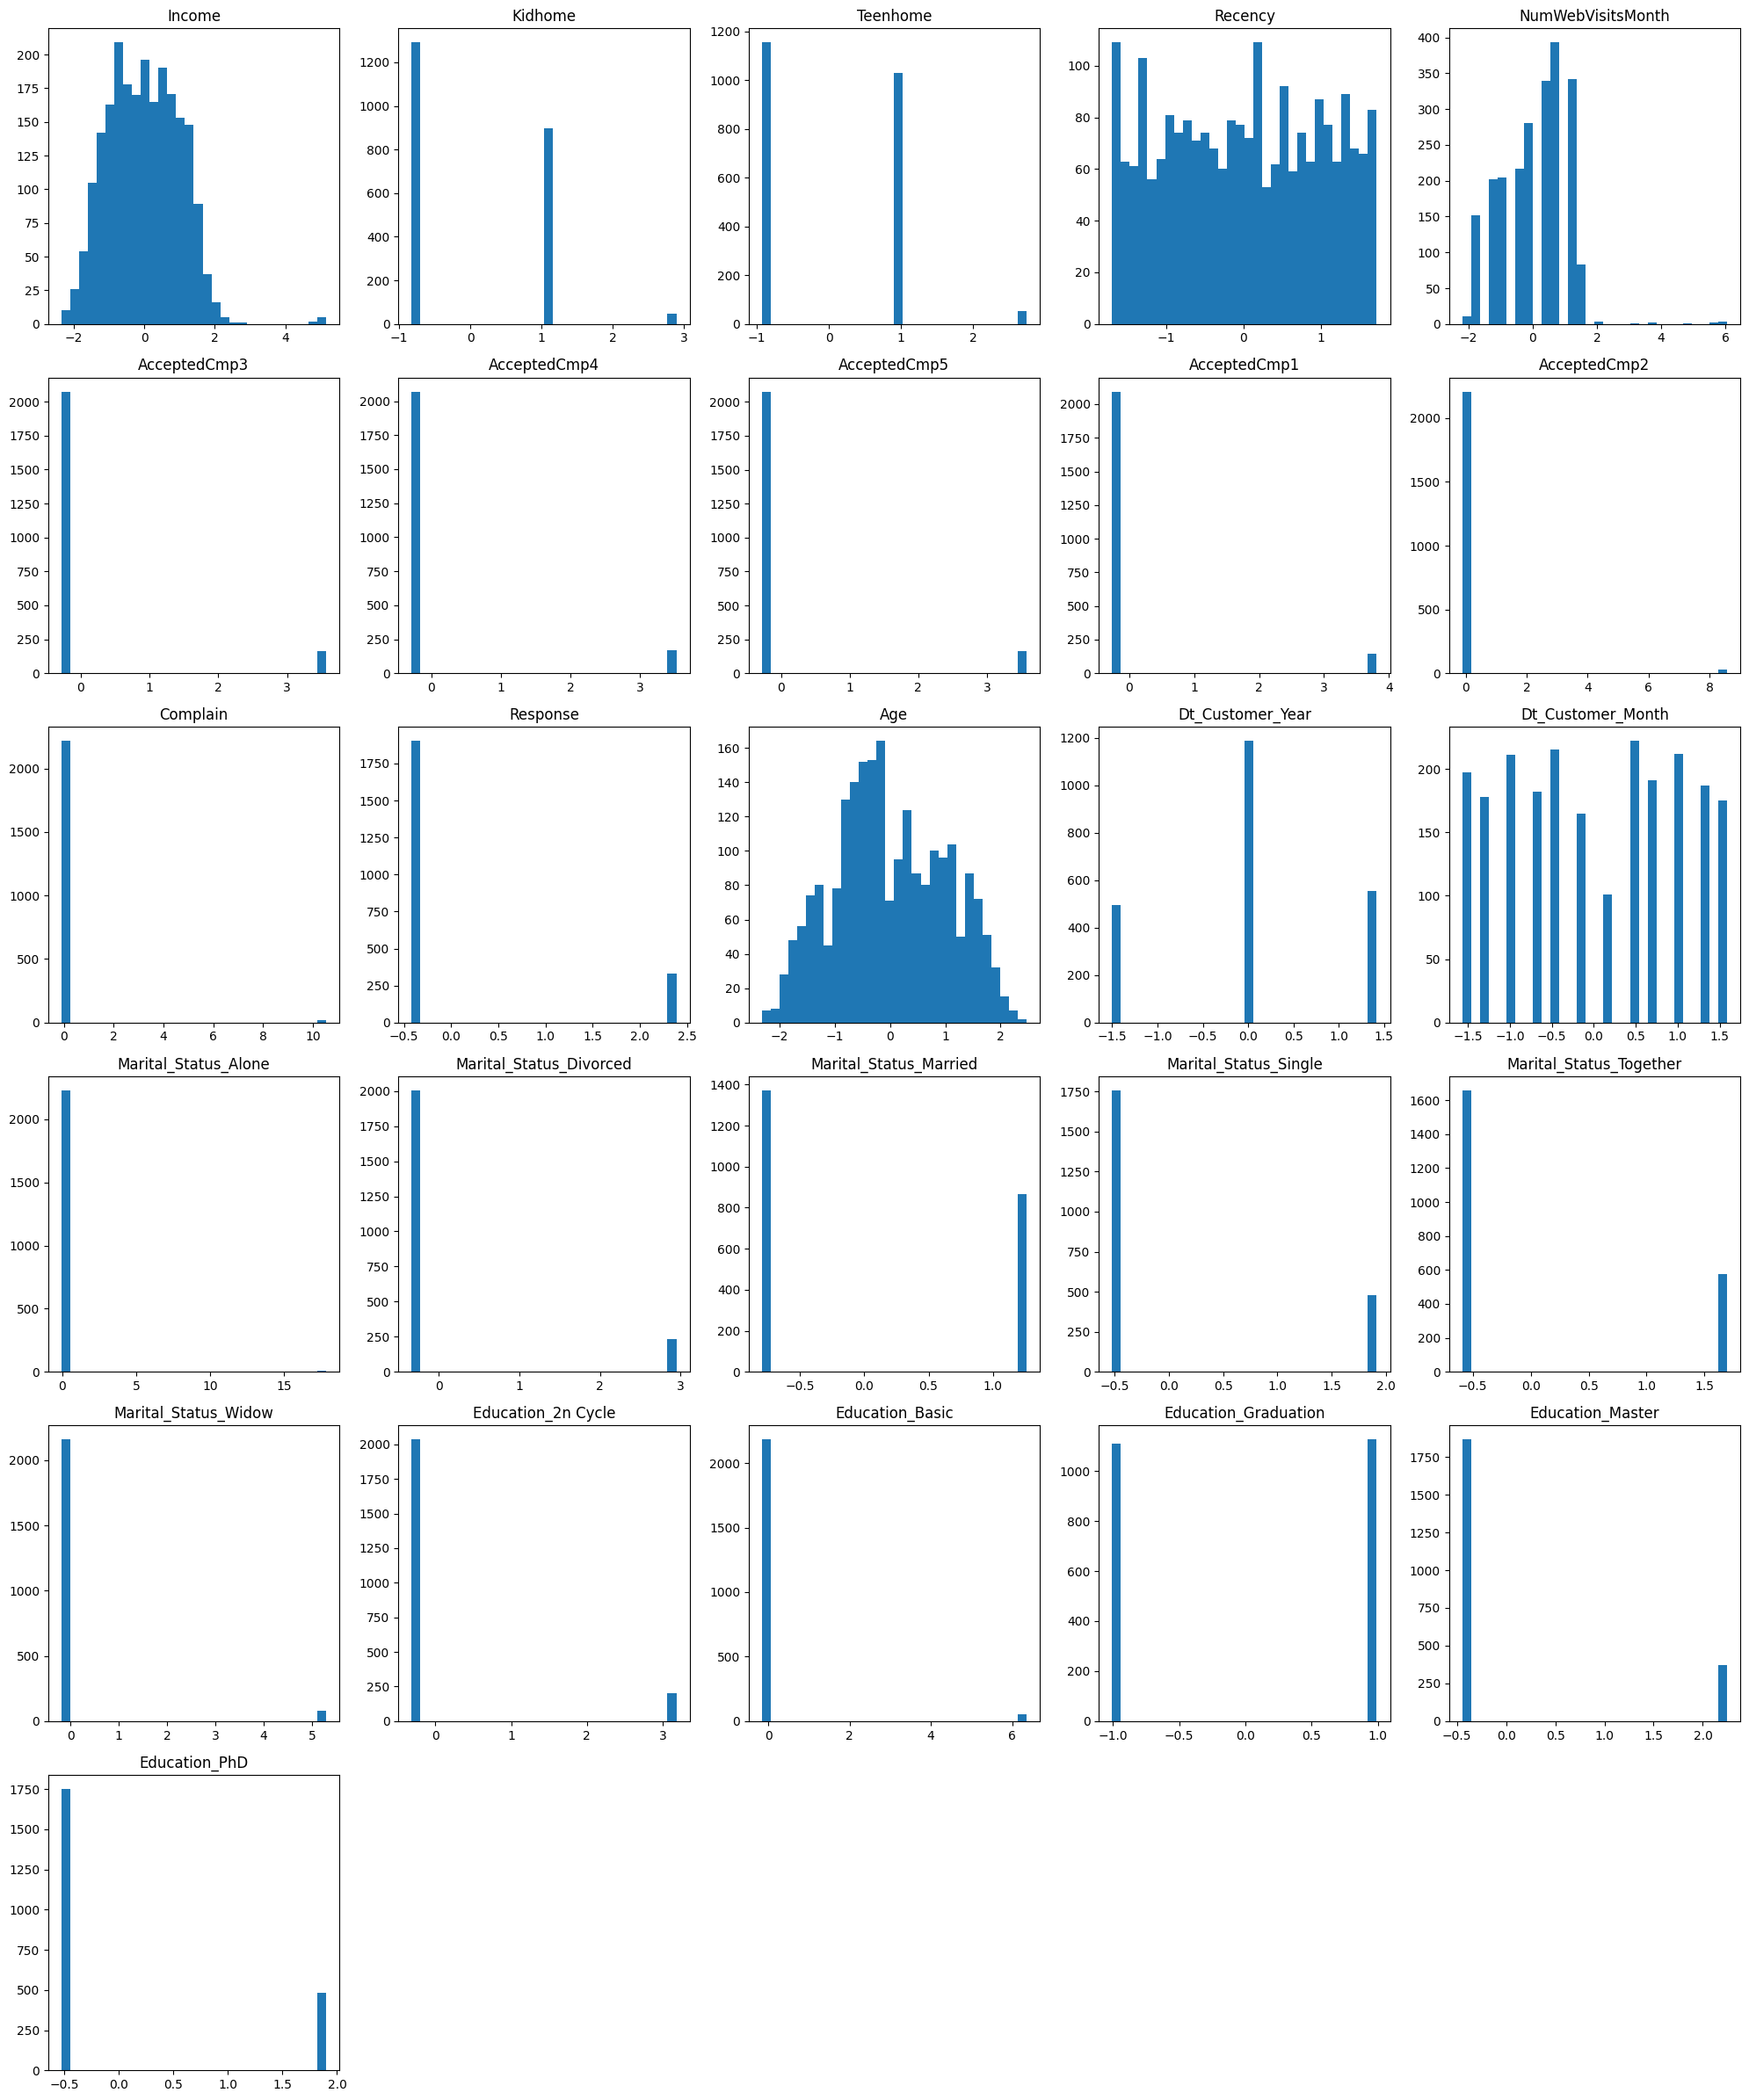

In [21]:
utilz.visualize_features(scaled_skewed_data)

In [22]:
scaled_skewed_data.to_csv('./data/scaled_skewed_data.csv', index=False)

In [23]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Save the scaled data back into the DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
# Drop the original log-transformed columns if not needed
scaled_data.drop(columns=right_skewed_features, inplace=True)

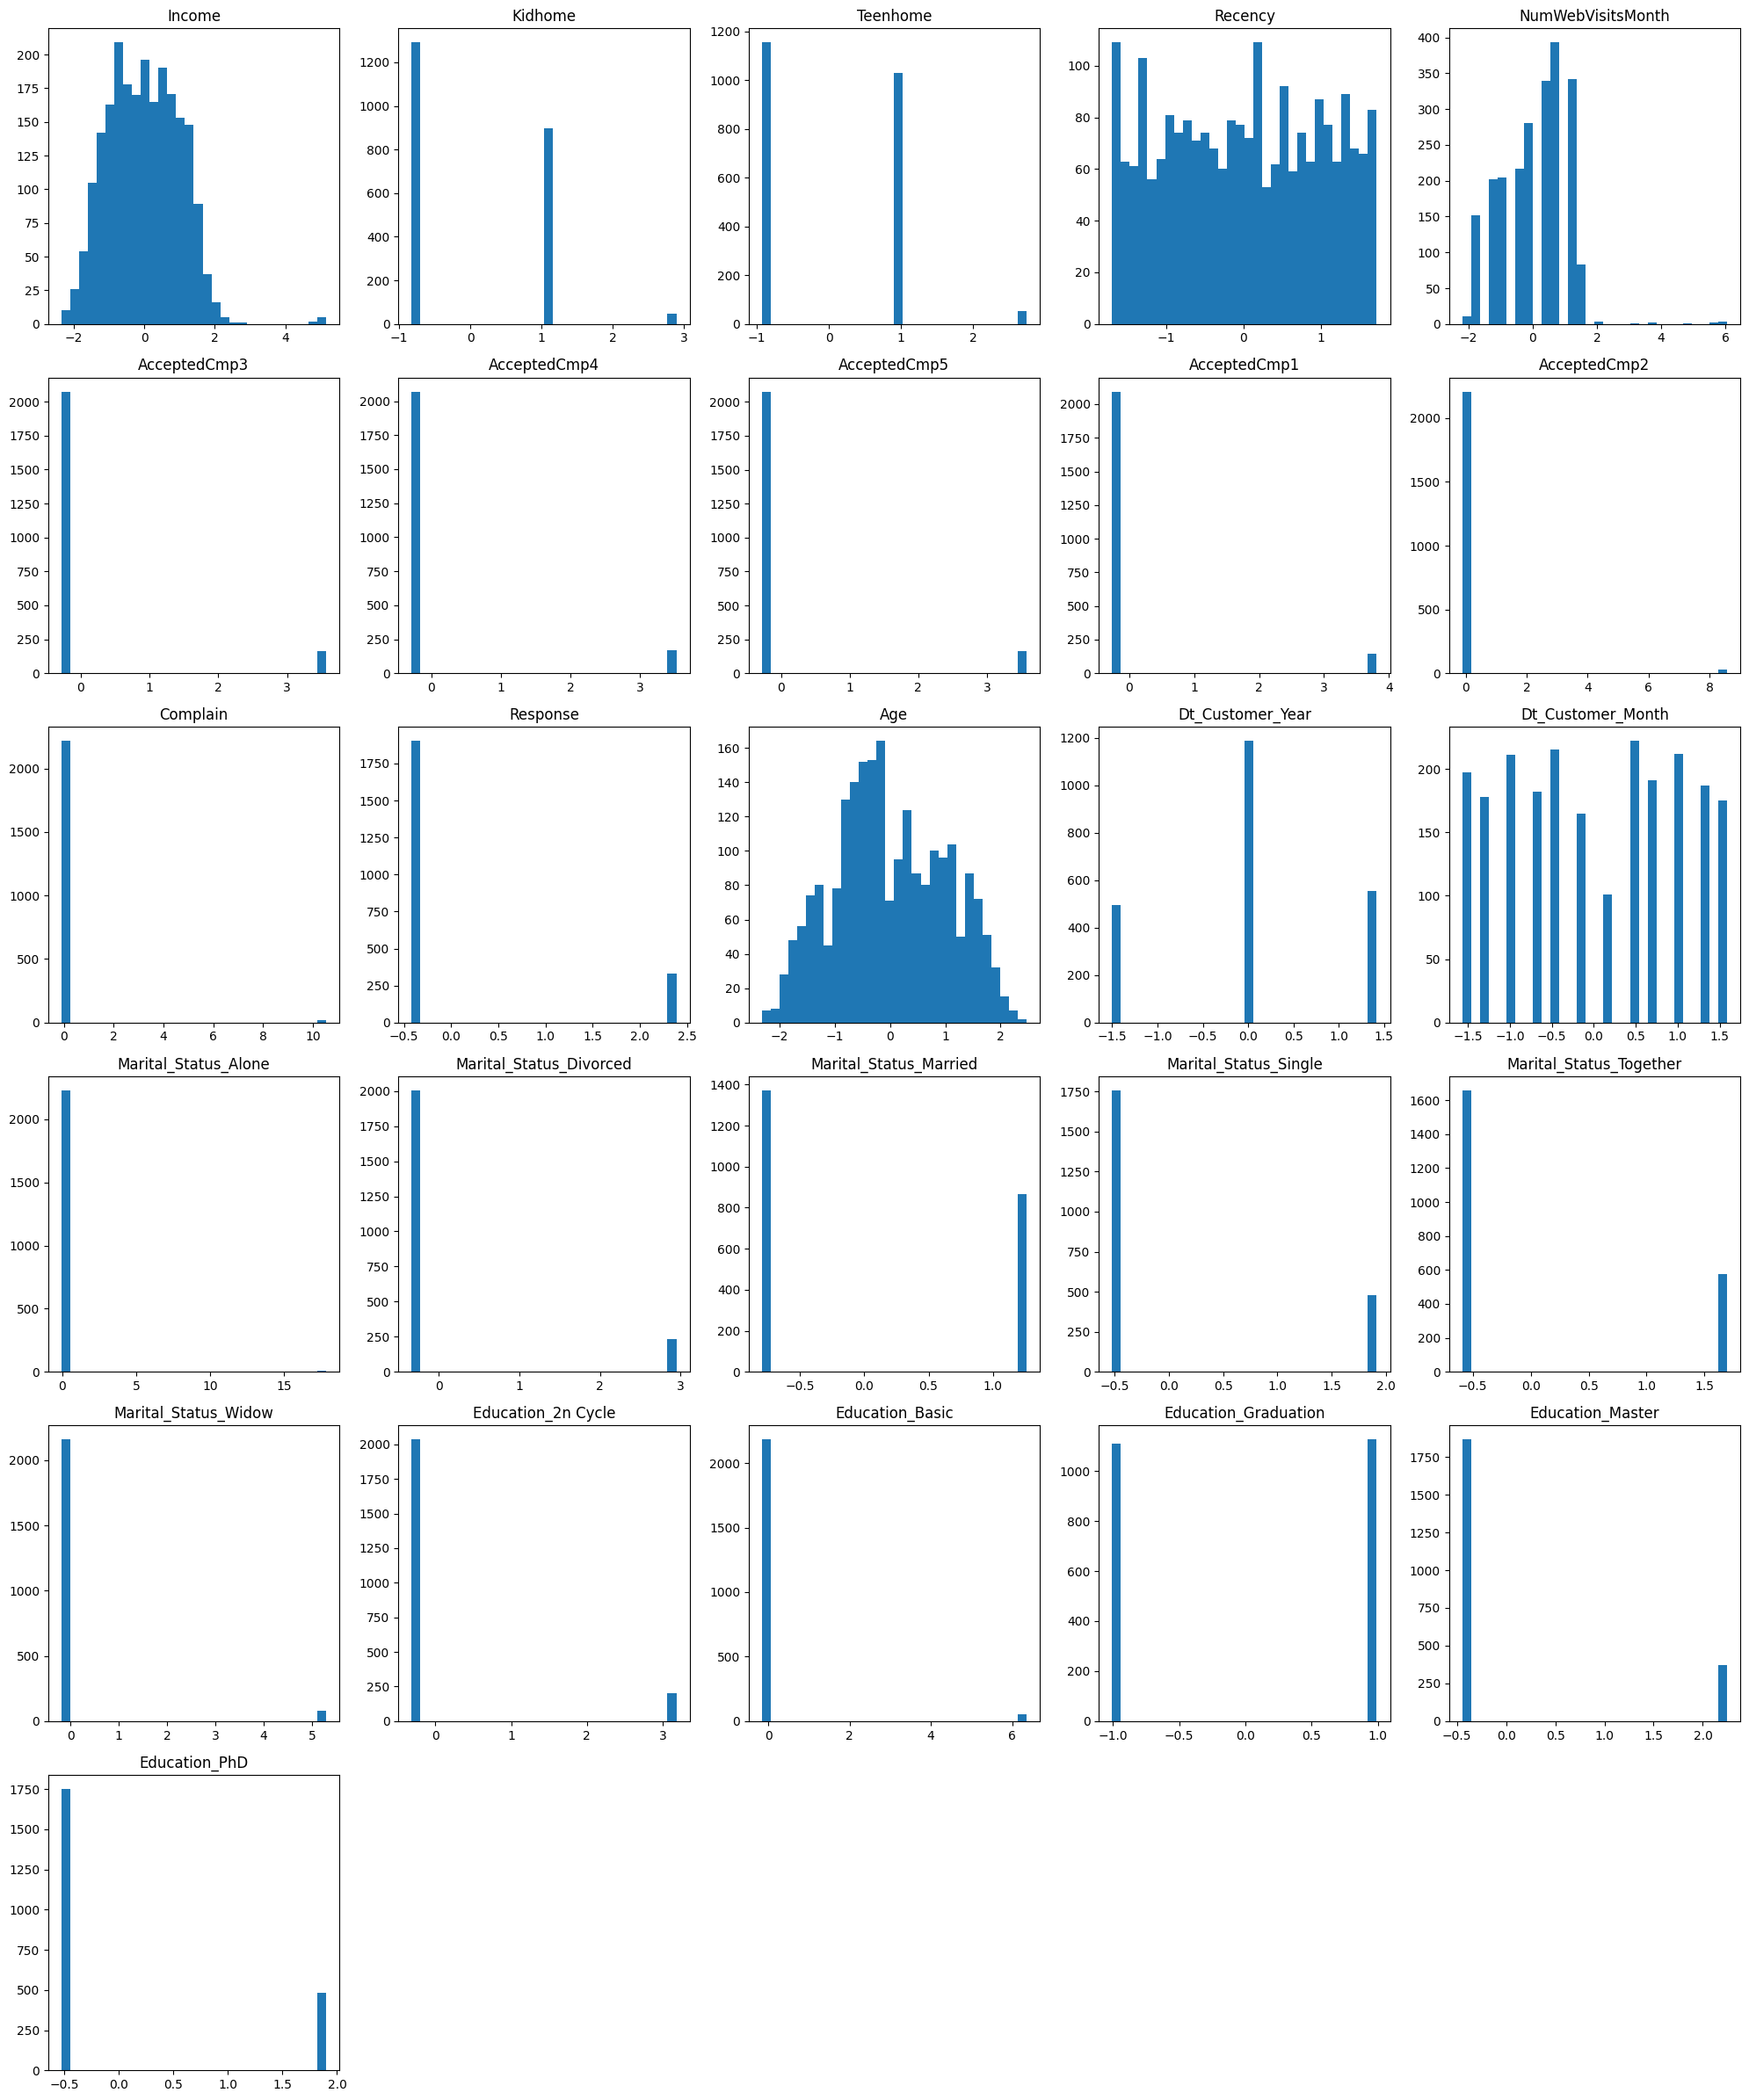

In [24]:
utilz.visualize_features(scaled_data)

In [25]:
scaled_data.to_csv('./data/scaled_data.csv', index=False)